<a href="https://colab.research.google.com/github/guy998877/projects/blob/main/liner_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Linear Regression**
*Daniel Ohayon - 322404559*

*Guy Zagorski - 207872850*

#### **Downloading the datasets**

In [ ]:
import json
import os.path

if not os.path.isfile("USA_cars_datasets.csv"):
  !pip install kaggle
  !mkdir /root/.kaggle
  api_key = {"username":"d4niel7","key":"381c0c6ced732a7f797794130e4bfb66"}
  with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(api_key, f)
  !chmod 600 /root/.kaggle/kaggle.json
  !kaggle datasets download -d doaaalsenani/usa-cers-dataset
  !unzip usa-cers-dataset.zip

if not os.path.isfile("Billionaire.csv"):
  !pip install kaggle
  !mkdir /root/.kaggle
  api_key = {"username":"d4niel7","key":"381c0c6ced732a7f797794130e4bfb66"}
  with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(api_key, f)
  !chmod 600 /root/.kaggle/kaggle.json
  !kaggle datasets download -d roysouravcu/forbes-billionaires-of-2021
  !unzip forbes-billionaires-of-2021.zip

if not os.path.isfile("diamonds.csv"):
  !pip install kaggle
  !mkdir /root/.kaggle
  api_key = {"username":"d4niel7","key":"381c0c6ced732a7f797794130e4bfb66"}
  with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(api_key, f)
  !chmod 600 /root/.kaggle/kaggle.json
  !kaggle datasets download -d shivam2503/diamonds
  !unzip diamonds.zip

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
import re
import seaborn as sns
from scipy.stats import pearsonr
from sklearn import metrics

## Part 1: Diamonds



In [ ]:
diamonds = pd.read_csv("./diamonds.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### **ANSWER 1**

In [ ]:
x_varibles = np.array(diamonds['carat'])
y_varibles = np.array(diamonds['price'])
corr, _ = pearsonr(x_varibles, y_varibles)
print('Pearsons correlation Carat Price: %.3f' % corr)

Pearsons correlation Carat Price: 0.922


In [ ]:
x_varibles = np.array(diamonds['depth'])
y_varibles = np.array(diamonds['price'])
corr, _ = pearsonr(x_varibles, y_varibles)
print('Pearsons correlation Depth Price: %.3f' % corr)

Pearsons correlation Depth Price: -0.011


### **ANSWER 2**

In [ ]:
cols = ["carat", "depth", "table","price", "x","y","z"]
corr = diamonds[cols].corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


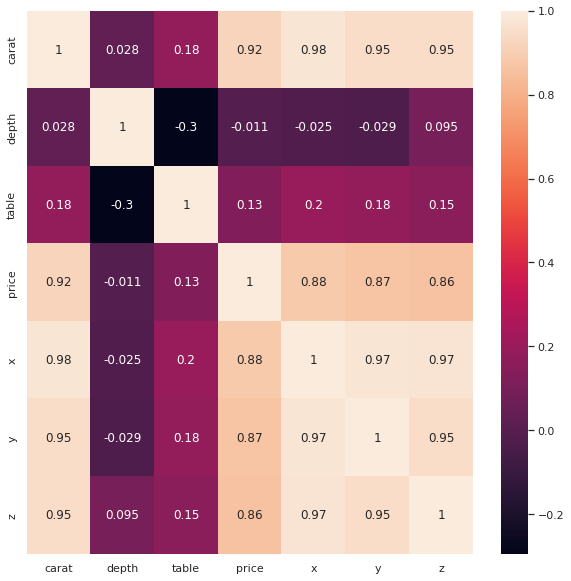

In [ ]:
sns.set(rc={"figure.figsize":(10,10)})
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

### **ANSWER 3**

First , We will find unique values in clarity

In [ ]:
clairities = diamonds['clarity'].unique()
clairities

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Second, iterate over unique value , for each unique value we add
its own plot with regression line

SI2 --> y = 7870.255440069479x -3418.3400994849208


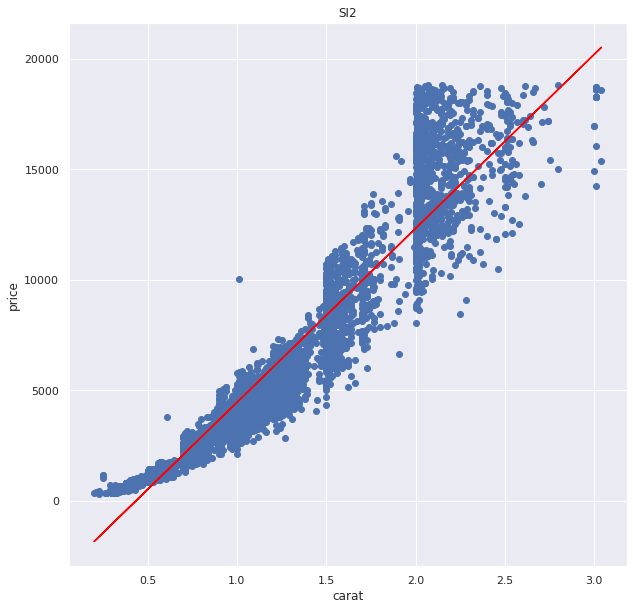

SI1 --> y = 8090.347505397721x -2884.695432346119


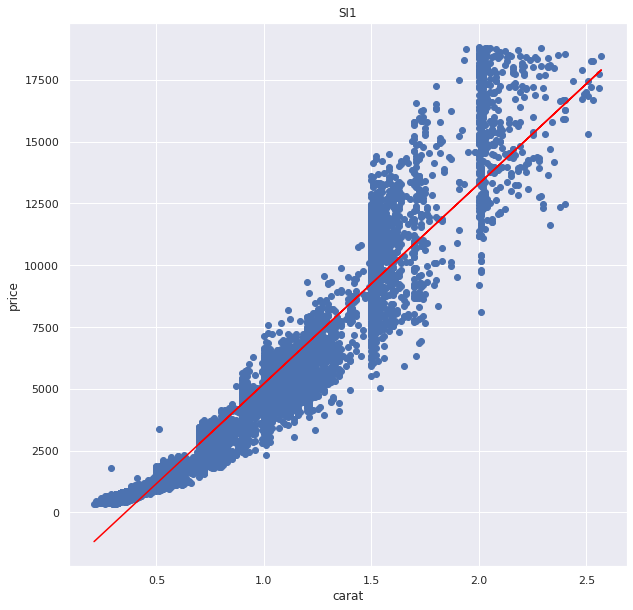

VS1 --> y = 9000.725954429634x -2705.4966758167493


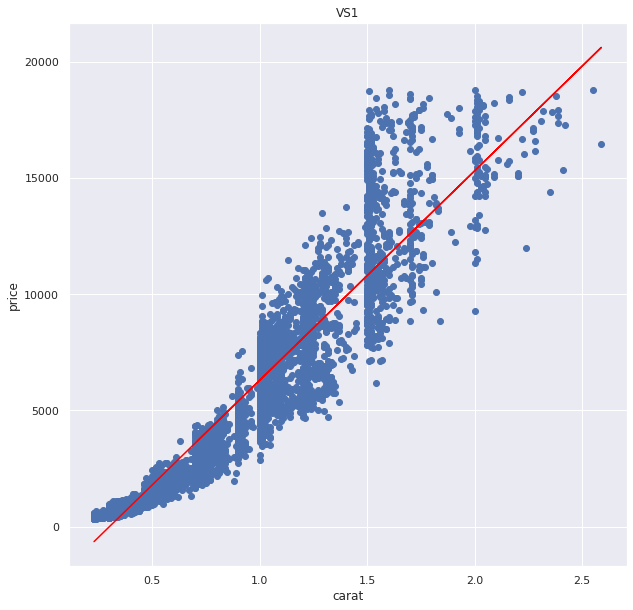

VS2 --> y = 8626.156973271902x -2664.8301522581


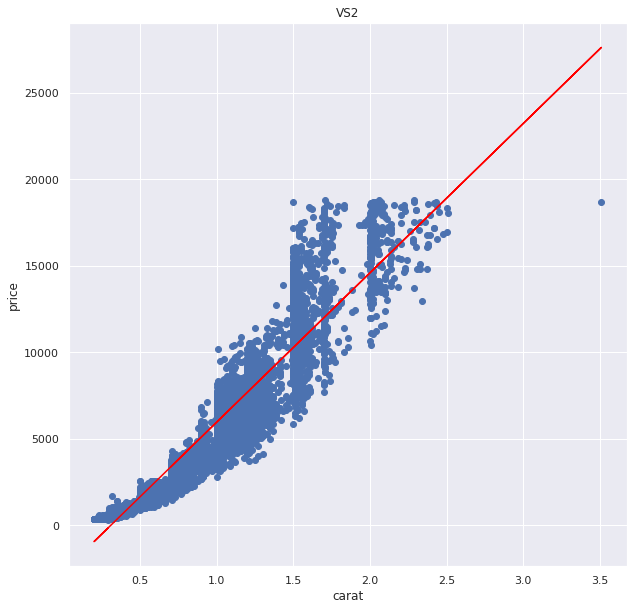

VVS2 --> y = 10077.188051237525x -2724.3039286292483


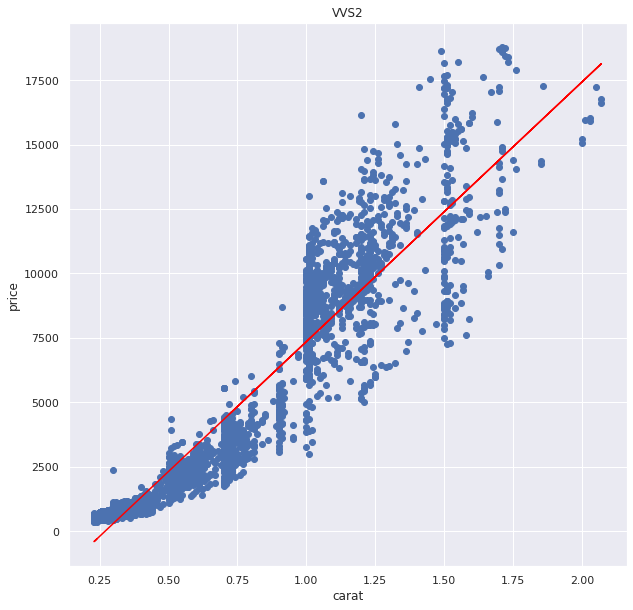

VVS1 --> y = 10469.250265041854x -2746.283873483337


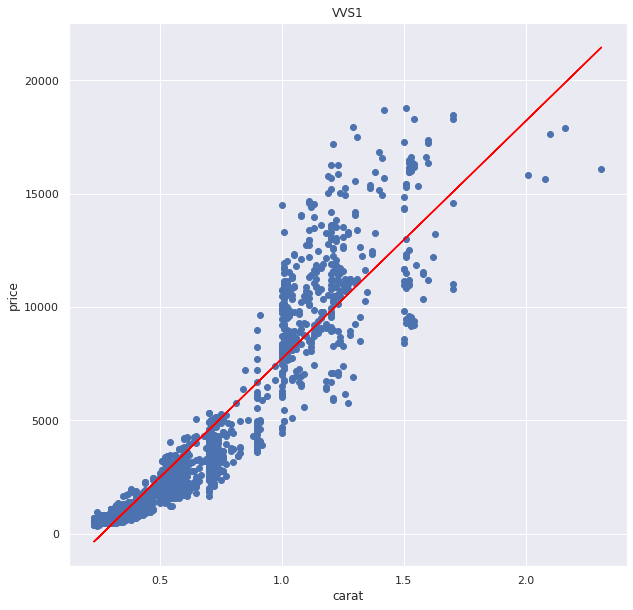

I1 --> y = 4209.793400455635x -1480.5583747037222


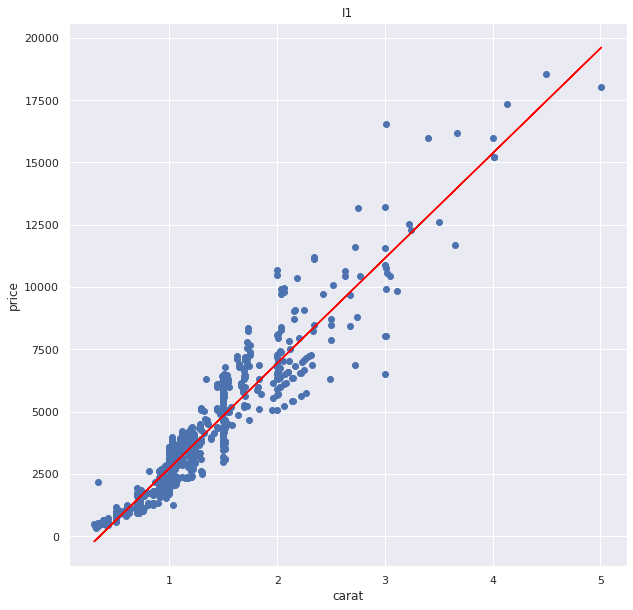

IF --> y = 11625.440626622749x -3007.4372354041852


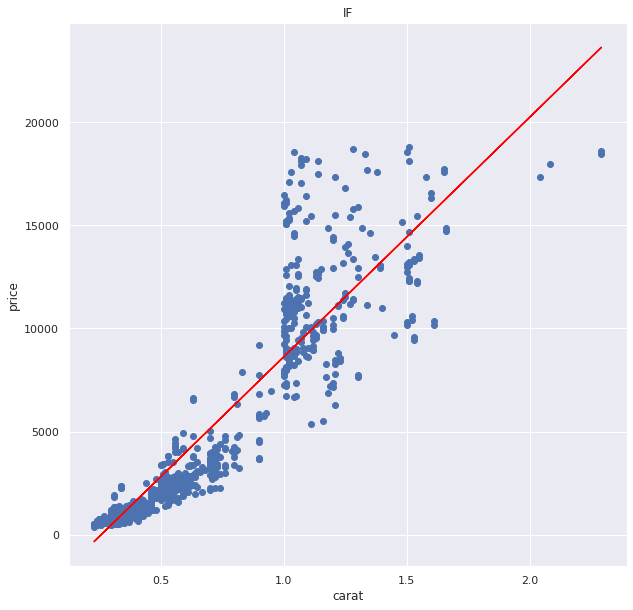

In [ ]:
for clairity_type in clairities:
  diamonds_type = diamonds[diamonds['clarity'] == clairity_type]
  linreg = LinearRegression()
  carat_list = [[i] for i in diamonds_type['carat'].values] 
  linreg.fit(carat_list, diamonds_type['price'].values)

  coef = linreg.coef_ # coefficent b_0
  intercept = linreg.intercept_ # b_1
  
  linear_func = lambda x: coef*x + intercept
  print(f"{clairity_type} --> y = {coef[0]}x {intercept}")
  predict_y_values = [linear_func(x) for x in diamonds_type['carat']]
  plt.scatter(diamonds_type['carat'], diamonds_type['price'])
  plt.xlabel("carat")
  plt.ylabel("price")

  #plot the regression line
  plt.plot(diamonds_type['carat'],predict_y_values, color='red' )
  plt.title(clairity_type)
  plt.show()


### **ANSWER 4**

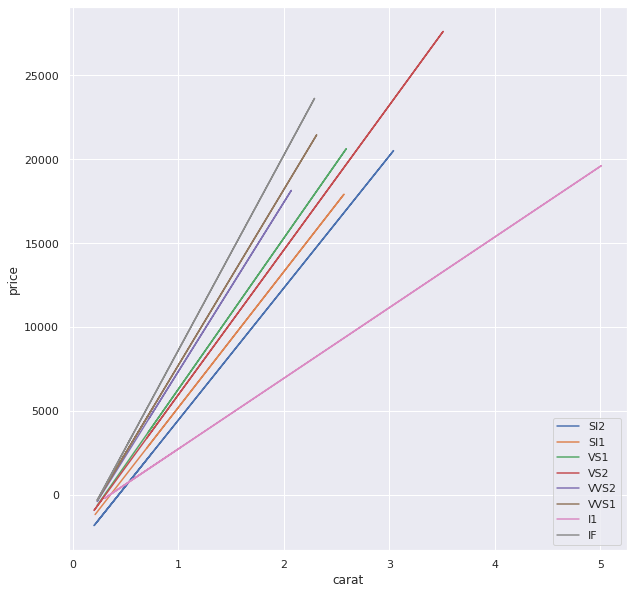

In [ ]:
unique = diamonds['clarity'].unique()
linear_line_value_list = []
for carat_type in unique:
  diamonds_type = diamonds[diamonds['clarity'] == carat_type]
  linreg = LinearRegression()
  carat_list = [[i] for i in diamonds_type['carat'].values] 
  linreg.fit(carat_list, diamonds_type['price'].values)

  coef = linreg.coef_ # coefficent b_0
  intercept = linreg.intercept_ # b_1

  linear_func = lambda x: coef*x + intercept
  predict_y_values = [linear_func(x) for x in diamonds_type['carat']]
  linear_line_value_list.append(predict_y_values)
  plt.plot(diamonds_type['carat'], predict_y_values)
  
  plt.xlabel("carat")
  plt.ylabel("price")


plt.legend(unique,loc=4)

### **ANSWER 5**

In [ ]:
diamonds_train = diamonds[:10000]
diamonds_test = diamonds[10000:]

In [ ]:
from sklearn.linear_model import LinearRegression
mlinreg = LinearRegression()
data_values_list = []
data_points_list = [row.values for index, row in  diamonds_train[["carat", "depth", "table", "x","y","z"]].iterrows()]
mlinreg.fit(data_points_list, diamonds_train['price'].values)

LinearRegression()

In [ ]:
print(f"Coefficient of model :{mlinreg.coef_}") # coefficent b_0
print(f"Intercept of model : {mlinreg.intercept_}") # b_1

Coefficient of model :[-3473.7362435     93.26176582     9.00140467   250.4582605
  2360.63985207   296.96198718]
Intercept of model : -16677.417843607887


$price = -3473.7362435*carat + 93.26176582*depth + 9.00140467*table + 250.4582605*x + 2360.63985207*y +296.96198718*z -  16677.417843607887$

In [ ]:
y_test = diamonds_test['price'].values
y_pred = mlinreg.predict([v for v in diamonds_test[["carat", "depth", "table", "x","y","z"]].values])

In [ ]:
print(f"MAE: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

MAE: 1929.2188815865916
RMSE: 3480.14098858197


## Part 2: US Cars Dataset

In [ ]:
df = pd.read_csv("USA_cars_datasets.csv")
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


We have a redundant column that is just the index (again). Let's get rid of it.

In [ ]:
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [ ]:
df['brand'].value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
honda                12
infiniti             12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
audi                  4
peterbilt             4
acura                 3
lincoln               2
lexus                 2
mazda                 2
toyota                1
jaguar                1
maserati              1
ram                   1
harley-davidson       1
Name: brand, dtype: int64

### **ANSWER 1**

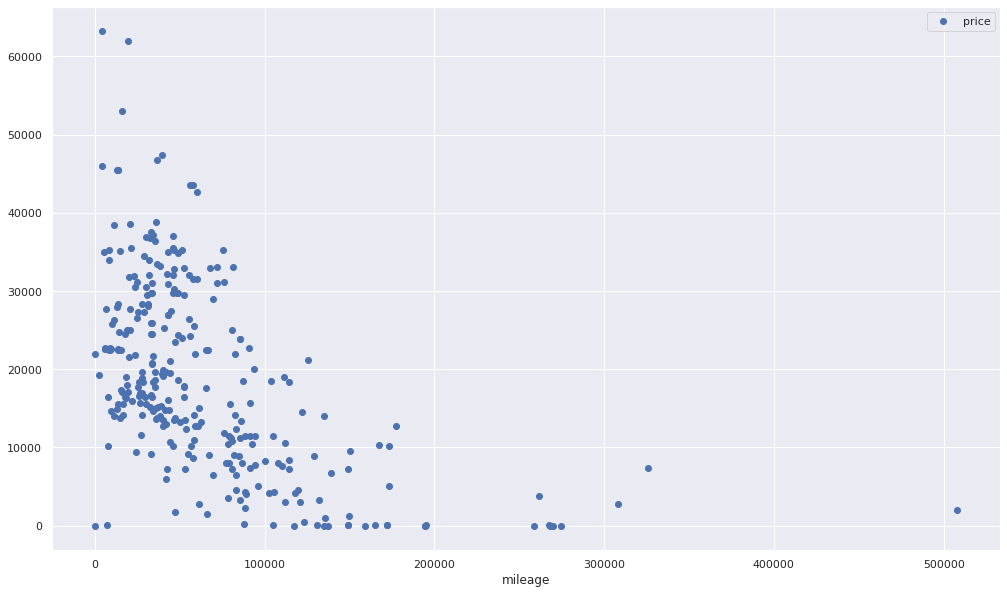

In [ ]:
chevrolet = df[df['brand'] == "chevrolet"]
chevrolet.plot(x="mileage", y="price", style="o", figsize=(17,10))

It seems like there is a value that's not valid. It can ruin the Linear Regression model.

In [ ]:
# Ignore the exceptional record
chevrolet = chevrolet[chevrolet['mileage'] != chevrolet['mileage'].max()]

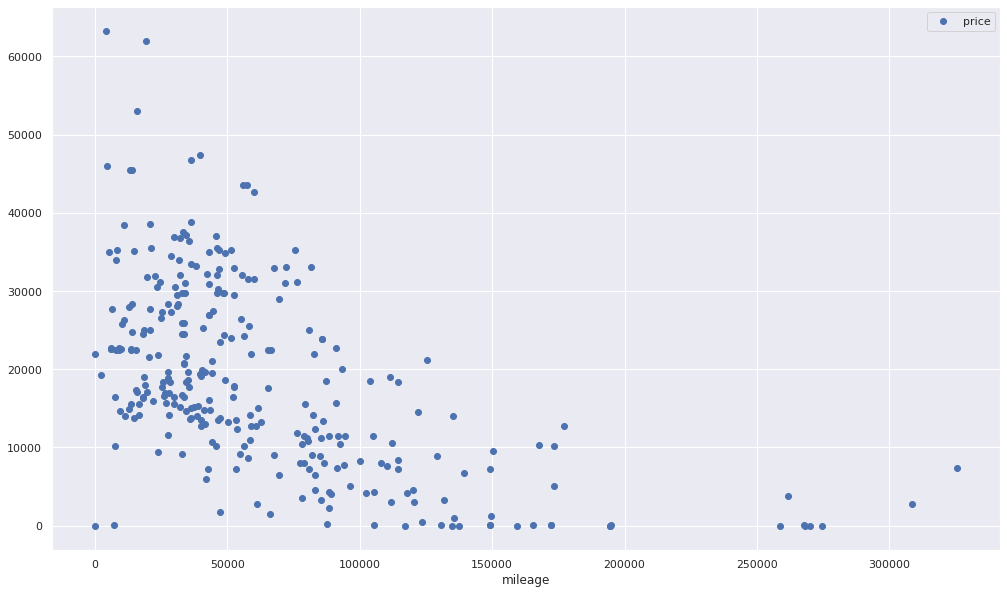

In [ ]:
chevrolet.plot(x="mileage", y="price", style="o", figsize=(17,10))

Now all the records are around the same mile range

In [ ]:
length_chevrolet = len(chevrolet.index)
X_chevrolet = chevrolet['mileage'].values.reshape(length_chevrolet, 1)
y_chevrolet = chevrolet['price'].values.reshape(length_chevrolet, 1)

In [ ]:
chevrolet_model = LinearRegression()
chevrolet_model.fit(X_chevrolet,y_chevrolet)

LinearRegression()

In [ ]:
def predict_price_chevrolet(mileage):
  slope = chevrolet_model.coef_[0][0]
  intercept = chevrolet_model.intercept_[0]
  return slope*mileage + intercept

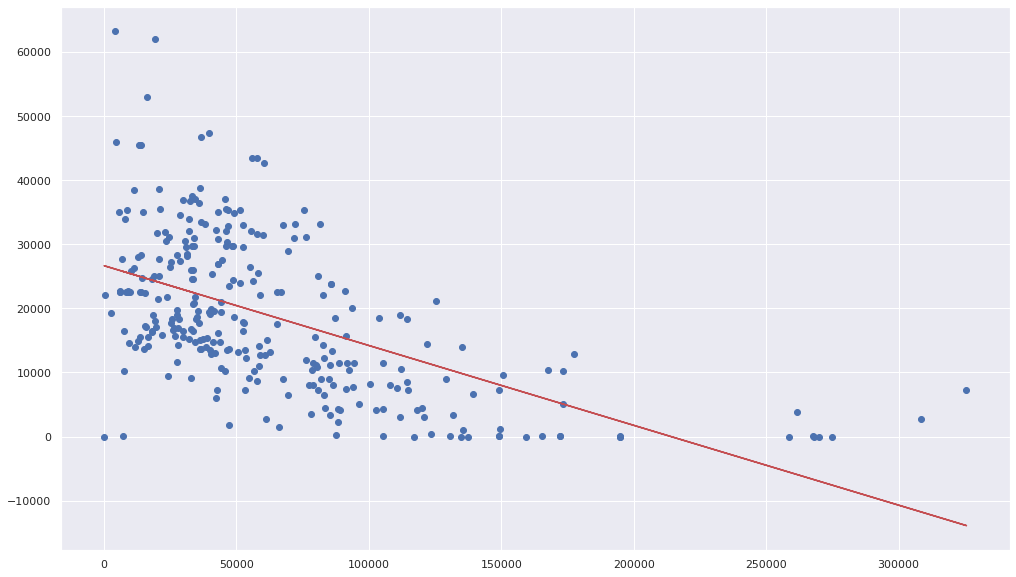

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
ax.scatter(X_chevrolet,y_chevrolet)
ax.plot(X_chevrolet, [predict_price_chevrolet(x) for x in X_chevrolet], color="r")

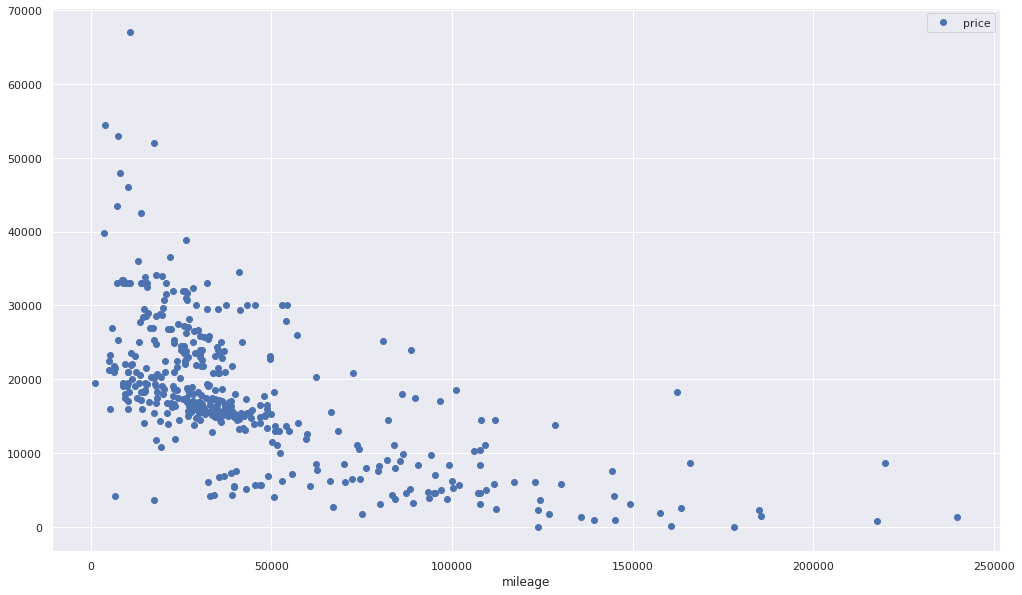

In [ ]:
dodge = df[df['brand'] == "dodge"]
dodge.plot(x="mileage", y="price", style="o", figsize=(17,10))

In [ ]:
length_dodge = len(dodge.index)
X_dodge = dodge['mileage'].values.reshape(length_dodge, 1)
y_dodge = dodge['price'].values.reshape(length_dodge, 1)

In [ ]:
dodge_model = LinearRegression()
dodge_model.fit(X_dodge,y_dodge)

LinearRegression()

In [ ]:
def predict_price_dodge(mileage):
  slope = dodge_model.coef_[0][0]
  intercept = dodge_model.intercept_[0]
  return slope*mileage + intercept

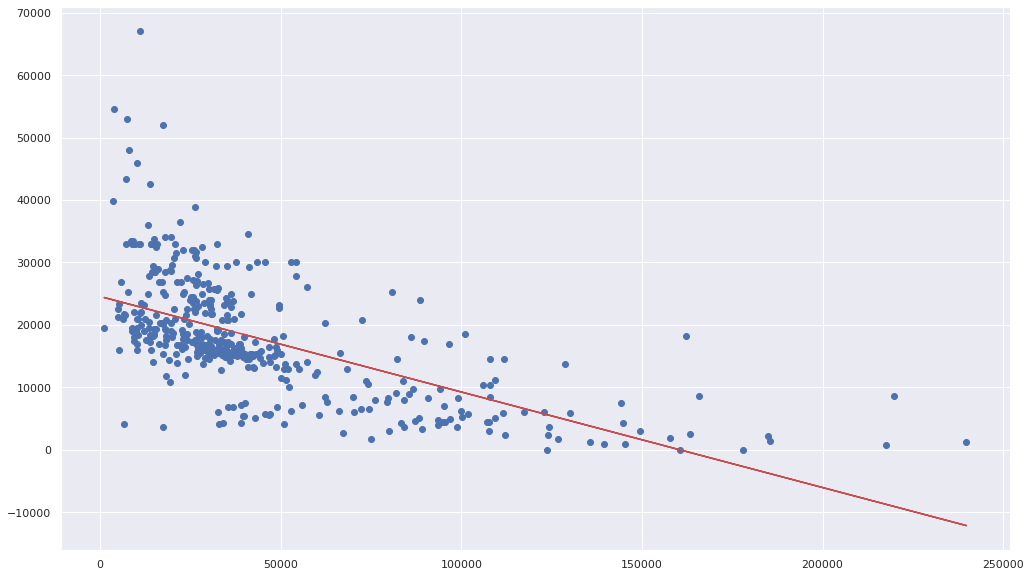

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
ax.scatter(X_dodge,y_dodge)
ax.plot(X_dodge, [predict_price_dodge(x) for x in X_dodge], color="r")

### **ANSWER 2**

In [ ]:
ford = df[df['brand'] == "ford"]
ford

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left
14,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,22 hours left
18,5210,ford,mpv,2017,clean vehicle,35714.0,white,2fmpk3j95hbb73607,167656124,texas,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,13800,ford,fusion,2019,clean vehicle,29345.0,white,3fa6p0lu1kr222799,167802379,north carolina,usa,2 days left
2200,56000,ford,srw,2018,clean vehicle,25371.0,black,1ft7w2bt4jec50359,167749689,pennsylvania,usa,3 days left
2201,13800,ford,fusion,2019,clean vehicle,30054.0,silver,3fa6p0lu3kr210749,167802380,north carolina,usa,2 days left
2202,45800,ford,srw,2018,clean vehicle,11173.0,white,1ft7w2bt3jeb02932,167749690,pennsylvania,usa,2 days left


In [ ]:
X_ford = [row.values for index, row in  ford[['mileage', 'year']].iterrows()]
y_ford = ford['price'].values

In [ ]:
ford_model = LinearRegression()
ford_model.fit(X_ford, y_ford)

LinearRegression()

In [ ]:
c1 = ford_model.coef_[0] # mileage
c2 = ford_model.coef_[1] # year
intercept = ford_model.intercept_
print(c1, c2, intercept)

-0.05953231437288058 1232.0664935649097 -2460018.226040193


$price = -0.0595*mileage + 1232.0665*year - 2460018.226$

In [ ]:
def predict_price_ford(mileage, year):
  c1 = ford_model.coef_[0] # mileage
  c2 = ford_model.coef_[1] # year
  intercept = ford_model.intercept_

  return c1*mileage + c2*year + intercept

### **ANSWER 3**

In [ ]:
predictions = [predict_price_ford(row.values[0], row.values[1]) for index, row in ford[['mileage', 'year']].iterrows()]
graph_2d = px.scatter(x=ford['mileage'], y=ford['year'], color=predictions, labels={"x": "mileage", "y": "year", "color": "expected price"})
graph_2d.show()

In [ ]:
graph_3d = px.scatter_3d(x=ford['mileage'], y=ford['year'], z=predictions, labels={"x": "mileage", "y": "year", "z": "expected price"})
graph_3d.show()

## Part 3: Forbes Billionaires of 2021

In [ ]:
df = pd.read_csv("Billionaire.csv")
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [ ]:
df['NetWorthNum'] = df['NetWorth'].apply(lambda x: int(re.search("\d+", x)[0]))
df

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorthNum
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology,1
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing,1
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining,1
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified,1


### **ANSWER 1**

In [ ]:
industries = df['Industry'].unique()
industries

array(['Technology', 'Automotive', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Food & Beverage',
       'Telecom', 'Media & Entertainment', 'Service',
       'Gambling & Casinos', 'Manufacturing', 'Real Estate',
       'Metals & Mining', 'Energy', 'Logistics', 'Healthcare',
       'Construction & Engineering', 'Sports'], dtype=object)

In [ ]:
corrs = {}
for i in industries:
  corr = df[df['Industry'] == i][['Age', 'NetWorthNum']].corr()
  corrs[i] = corr
  print(i)
  print(len(i)*'-')
  print(corr)
  print(40*'=')

Technology
----------
                  Age  NetWorthNum
Age          1.000000    -0.010105
NetWorthNum -0.010105     1.000000
Automotive
----------
                  Age  NetWorthNum
Age          1.000000    -0.117989
NetWorthNum -0.117989     1.000000
Fashion & Retail
----------------
                 Age  NetWorthNum
Age          1.00000      0.13618
NetWorthNum  0.13618      1.00000
Finance & Investments
---------------------
                  Age  NetWorthNum
Age          1.000000     0.098878
NetWorthNum  0.098878     1.000000
Diversified
-----------
                  Age  NetWorthNum
Age          1.000000     0.040522
NetWorthNum  0.040522     1.000000
Food & Beverage
---------------
                  Age  NetWorthNum
Age          1.000000     0.045382
NetWorthNum  0.045382     1.000000
Telecom
-------
                  Age  NetWorthNum
Age          1.000000     0.223526
NetWorthNum  0.223526     1.000000
Media & Entertainment
---------------------
                  Age  NetWort

### **ANSWER 2**

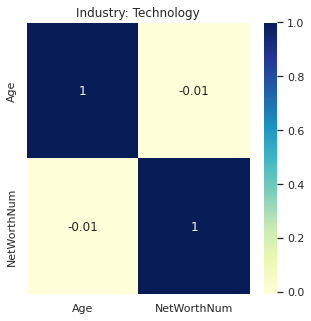

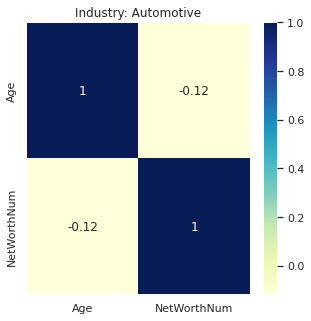

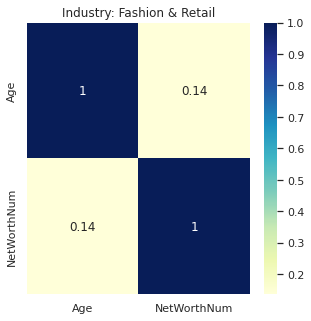

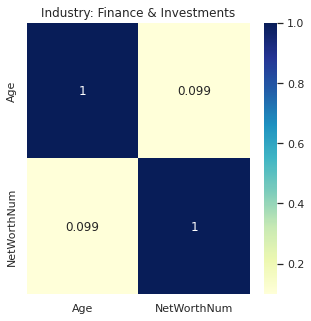

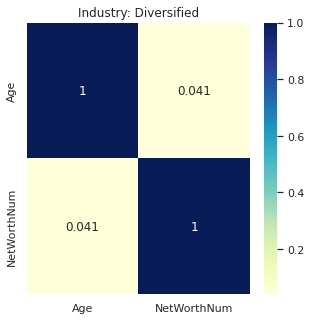

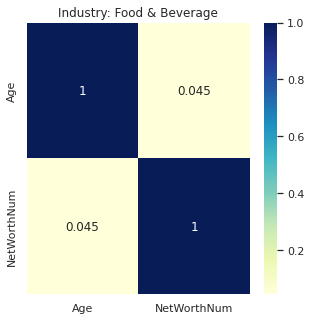

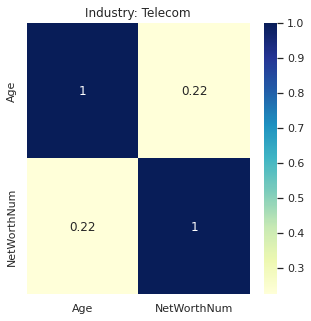

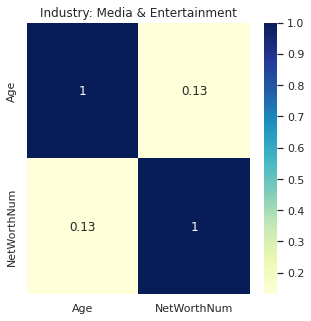

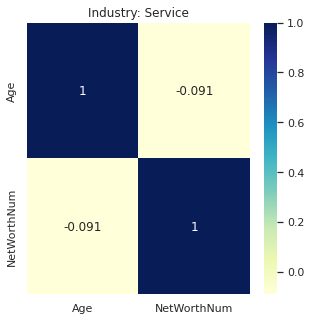

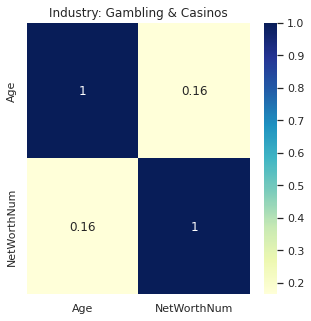

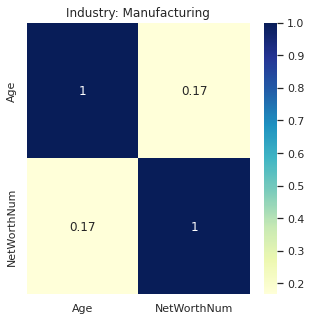

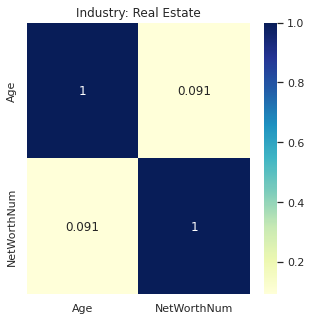

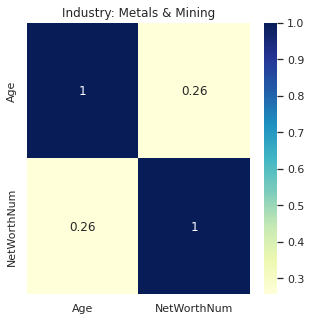

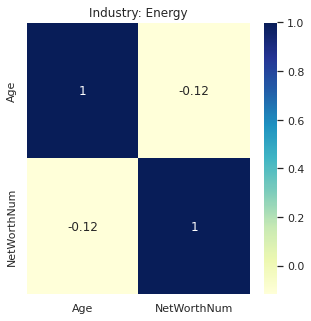

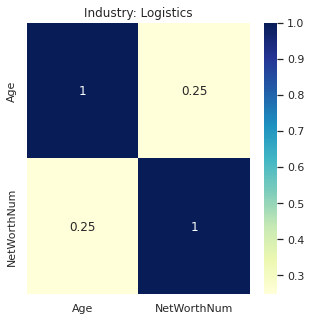

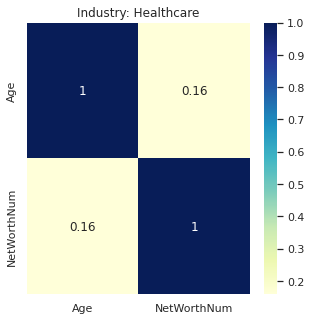

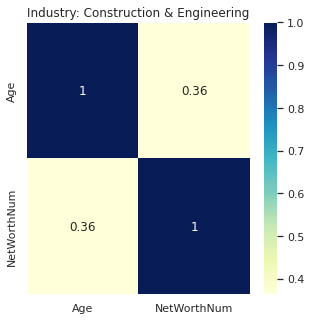

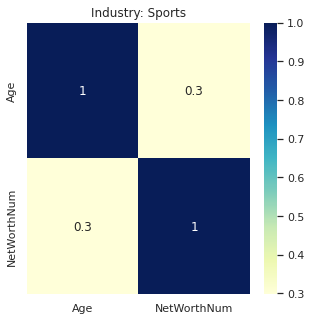

In [ ]:
sns.set(rc={"figure.figsize":(5,5)})
for i in corrs:
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.set_title(f"Industry: {i}")
  sns.heatmap(corrs[i], cmap="YlGnBu", ax=ax, annot=True)